<a href="https://colab.research.google.com/github/stafars/sem-3_diart_mipt_hw/blob/main/HW1_Artyushchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Источник (Файл ДЗ-1): https://colab.research.google.com/drive/1ERSjcwGIhwak_j0Z2VUfw23PC-UeEaiO

In [ ]:
!pip install marimo -qq
import marimo as mo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 19.9 MB/s eta 0:00:00


## Домашнее задание 1
### Цель задания

Сегодня ваша задача как гейм-аналитика — написать код,  чтобы найти наиболее прибыльные жанры игр и решить, какие 3 игры продаются лучше всех.

### Навыки

|Архитектура|Базы данных|Форматы данных|Инструменты|Коммуникации|ИИ     |
|-----------|-----------|--------------|-----------|------------|-------|
|Отсутствует|нет        |CSV/JSON      |Git        |нет         |ChatGPT|

### Условия

Можно пользоваться любыми языковыми моделями.

###  Формат сдачи и отправка задания

Итоговый блокнот нужно разместить на GitLab либо на GitHub («запушить» в любом формате .py или .ipynb)
и поделиться ссылкой на файл (убедившись в видимости репозитория).

###  Критерии оценивания

| Критерий | Вес | Описание |
|----------|-----|-----------|
| **Основная функциональность** | 2 | Все основные требования задания выполнены корректно (задания 2 и 4) |
| | 1 | Большая часть требований выполнена, но есть незначительные недочеты или пропуски |
|  | 0 | Основные требования не выполнены или выполнены некорректно|
| **Выбор алгоритма** | 1.5 | Выбранные подходы и алгоритмы (например, groupby().sum()) оптимальны и уместны для задачи |
|  | 0.5 | Подходы в целом верны, но могли бы быть более эффективными или уместными |
|  | 0 | Подходы не соответствуют задаче |
| **Точность реализации** | 1.5 | Код реализован корректно, без ошибок, расчеты точны, логика полностью соответствует задаче |
|  | 0.5 | Есть мелкие неточности или логические ошибки, не влияющие критически на результат |
|  | 0 | Содержит существенные ошибки, препятствующие получению верного результата|
| **Обработка краевых случаев** | 1 | Код устойчив к различным входным данным, учтены потенциальные краевые условия |
|  | 0 | Краевые случаи не учтены, возможны ошибки в специфических сценариях |
| **Документация к коду** | 1 | Код прокомментирован, комментарии ясны, помогают понять логику |
|  | 0 | Комментарии отсутствуют или бесполезны |
| **Объяснение результатов** | 1 | Выводы по результатам работы кода четкие, логичные и обоснованные данными |
|  | 0 | Выводы отсутствуют или не имеют отношения к данным |
| **Стиль кода** | 1 | Код читаем, соответствует стандартам PEP-8 |
|  | 0 | Код плохо читаем, стандарты стиля не соблюдены |
| **Анализ ошибок и отладка** | 1 | Способность выявить, понять и исправить ошибку (задание 5) показана полностью и эффективно |
|  | 0 | Ошибка не исправлена или понимание ее причин отсутствует |


**Максимальный балл за выполненную домашнюю работу: 10 баллов**

**Дополнительные условия оценки:**

Можно сдать работу через обычный Google Colab без начисления штрафных баллов и поделиться ссылкой на файл.

**Как будет проверяться:**

Работа будет проверяться преподавателем вручную в течение максимум одной недели.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_id = '1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
videogames_dataset = pd.read_csv(url)
videogames_dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### **Задание 1**

Поработайте с кодом выше и скачайте датасет. Используя промпт ниже, скормите вашей LLM датасет и получите описание набора данных.
```
опишите набор данных на русском языке @videogames_dataset
```

#### Хорошая новость — вы моментально получите описание набора данных.

Данный набор данных содержит информацию о видеоиграх. Вот описание каждого столбца:

- `Name`: название видеоигры;
- `Platform`: платформа, для которой была выпущена игра (например, Wii, NES);
- `Year_of_Release`: год выпуска игры;
- `Genre`: жанр игры (например, спорт, гонки);
- `Publisher`: издатель игры;
- `NA_Sales`: продажи в Северной Америке (в миллионах единиц);
- `EU_Sales`: продажи в Европе (в миллионах единиц);
- `JP_Sales`: продажи в Японии (в миллионах единиц);
- `Other_Sales`: продажи в других регионах (в миллионах единиц);
- `Global_Sales`: глобальные продажи (в миллионах единиц);
- `Critic_Score`: оценка критиков (максимально 100);
- `Critic_Count`: количество оценок критиков;
- `User_Score`: оценка пользователей (обычно до 10);
- `User_Count`: количество оценок пользователей;
- `Developer`: разработчик игры;
- `Rating`: рейтинг ESRB (возрастная категория игры).

#### Плохая новость — за выполнение задания таким образом вы получите ноль баллов.

 Почему?

 Вы не писали код при выполнении этого задания.

 Мы здесь для того, чтобы научиться писать код при работе с данными.

# Скачивание

In [ ]:
# скачивание
import gdown
gdown.download(url)

Downloading...
From: https://drive.google.com/uc?export=download&id=1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_
To: /content/Video_Games_Sales_as_at_22_Dec_2016.csv
100%|██████████| 1.61M/1.61M [00:00<00:00, 116MB/s]


'Video_Games_Sales_as_at_22_Dec_2016.csv'

In [ ]:
from google.colab import files
files.download('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Первичный анализ

In [10]:
# Делаем название датасета более унифицированным, чтобы при изменении имени датасета менять только одну строчку

df = videogames_dataset

# Вывод общей информации о структуре данных
df.info()
# Year_of_Release можно перевести в datetime формат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
# Вывод основных метрик:
  # mean, std - среднее и стандартное отклонение
  # 25%, 50%, 75% - квартили (квантили, которые берут по четверти) 50% - он же медиана
  # если mean сильно отличается от квартиля 50% - может сигнализировать о выбросах

df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,10096,9950
unique,11562,31,NaN,12,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000,NaN,NaN


In [ ]:
# Вывод пустых значений и дубликатов строк (разделение вывода пунктиром)

print(df.isnull().sum())
print('-----------------------')
print(df.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
-----------------------
0


<Axes: >

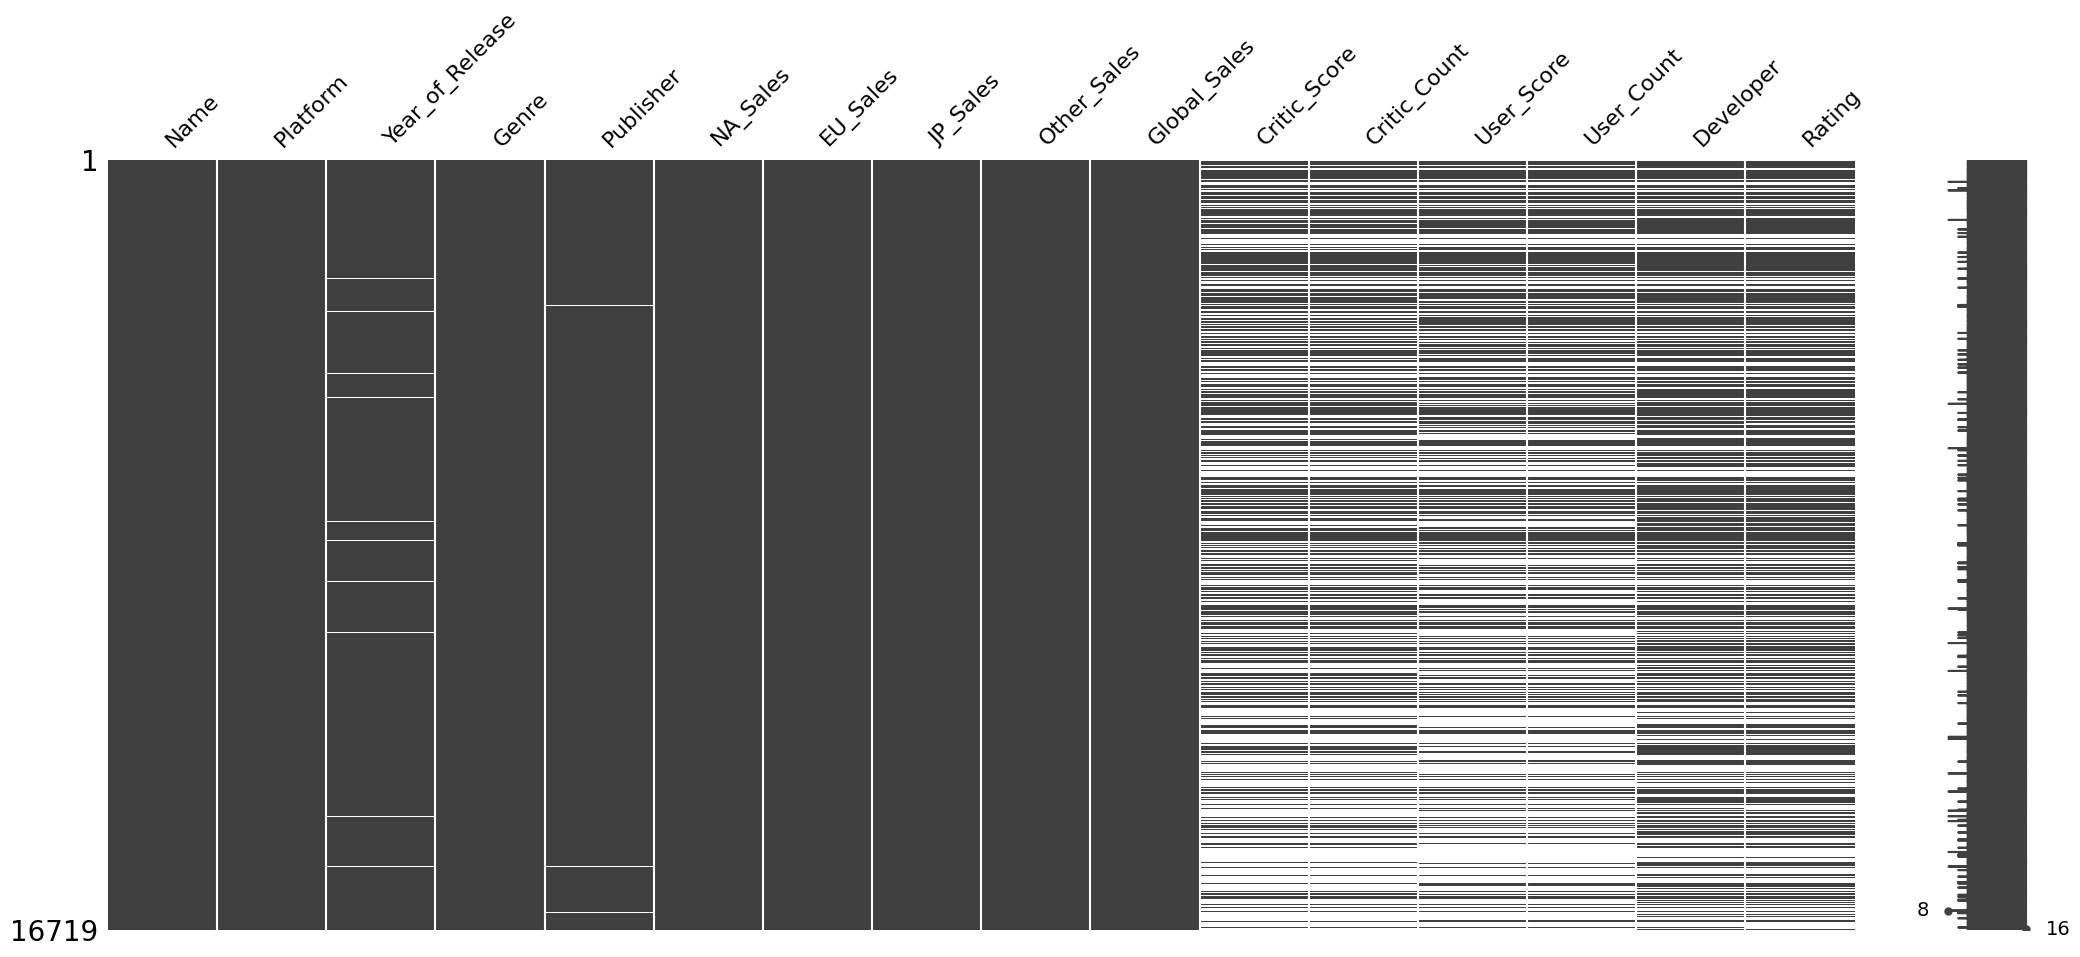

In [ ]:
# Проверка на пропущенные значения с помощью библиотеки missingno для наглядности
import missingno
missingno.matrix(df)

In [ ]:
# В следующих полях слишком много пустых значений:
  # Critic_Score       8582
  # Critic_Count       8582
  # User_Score         9129
  # User_Count         9129
  # Developer          6623
  # Rating             6769

# Поля которые можно обработать:
  # Name                  2
  # Genre                 2
  # Year_of_Release     269
  # Publisher            54

In [11]:
# Делаем копию датасета, с которой будем работать по обработке данных
df_copy = df.copy()
df_llm = df.copy()

In [ ]:
from transformers import pipeline
import time

# Загрузка модели
model_name = "microsoft/DialoGPT-small"

# Создание пайплайна для генерации текста
generator = pipeline("text-generation", model=model_name)

# Функция для генерации промпта и получения ответа от LLM
def fill_missing_with_llm(row, missing_col):
    if missing_col == 'Year_of_Release' and pd.notna(row['Name']):
        prompt = f"Что год выпуска игры '{row['Name']}'? Верни только год (например, 1995) или 'Unknown' если не знаешь."
    elif missing_col == 'Publisher' and pd.notna(row['Name']):
        prompt = f"Кто издатель игры '{row['Name']}'? Верни только название издателя или 'Unknown'."
    elif missing_col == 'Name' and pd.notna(row['Platform']) and pd.notna(row['Publisher']) and pd.notna(row['Year_of_Release']):
        prompt = f"Какая игра выпущена на платформе '{row['Platform']}' издателем '{row['Publisher']}' в {row['Year_of_Release']} году? Верни только название игры или 'Unknown'."
    elif missing_col == 'Genre' and pd.notna(row['Platform']) and pd.notna(row['Publisher']) and pd.notna(row['Year_of_Release']):
        prompt = f"Какой жанр у игры, выпущенной на платформе '{row['Platform']}' издателем '{row['Publisher']}' в {row['Year_of_Release']} году? Верни только жанр (например, Action) или 'Unknown'."
    else:
        return None

    try:
        # Генерация ответа
        output = generator(prompt, max_length=50, num_return_sequences=1, truncation=True)
        answer = output[0]['generated_text'].replace(prompt, '').strip().split('\n')[0]  # Извлечь ответ
        return answer if answer and answer != 'Unknown' else None
    except Exception as e:
        print(f"Ошибка: {e}")
        return None

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:

# Обработка пропусков (с задержками для Colab)
for index, row in df_missing.iterrows():
    if pd.isna(row['Year_of_Release']) and pd.notna(row['Name']):
        df_missing.at[index, 'Year_of_Release'] = fill_missing_with_llm(row, 'Year_of_Release')
        time.sleep(0.5)  # Задержка для стабильности

    # Аналогично для других пропусков...

# Сохранение (скачайте файл)
df_missing.to_csv('vgsales_filled.csv', index=False)
#from google.colab import files
#files.download('vgsales_filled.csv')  # Скачать результат
#print("Датасет обновлен! 🎉")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
/tmp/ipython-input-2824765843.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '?' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_missing.at[index, 'Year_of_Release'] = fill_missing_with_llm(row, 'Year_of_Release')
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pa

KeyboardInterrupt: 

In [ ]:
# Колонку Year_of_Release можно привести к datetime (год)
df_copy['Year_of_Release'] = pd.to_datetime(df_copy['Year_of_Release'], format='%Y', errors='coerce')
print(df_copy['Year_of_Release'].head())

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: Year_of_Release, dtype: datetime64[ns]


In [ ]:
# Посмотрим что общего в колонках с пропусками Name
empty_name = df_copy[df_copy['Name'].isna()].reset_index(drop=True)
empty_name

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,NaN,GEN,1993-01-01,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GEN,1993-01-01,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Посмотрим что общего в колонках с пропусками Year_of_Release
empty_year = df_copy[df_copy['Year_of_Release'].isna()].reset_index(drop=True)
empty_year

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
1,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
2,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
3,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,PDC World Championship Darts 2008,PSP,NaT,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,NaN,NaN,Oxygen Interactive,E10+
265,Freaky Flyers,GC,NaT,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
266,Inversion,PC,NaT,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
267,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Вывести все строки с Acclaim Entertainment
acclaim_games = df[df['Publisher'] == 'Acclaim Entertainment']
acclaim_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
399,WWF War Zone,PS,1998.0,Fighting,Acclaim Entertainment,2.47,0.76,0.00,0.13,3.36,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
933,Turok 2: Seeds of Evil,N64,1997.0,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,XGRA: Extreme G Racing Association,GC,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,69.0,13.0,7.0,5.0,Acclaim Studios Cheltenham,T
15487,XGRA: Extreme G Racing Association,XB,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,66.0,15.0,6.8,5.0,Acclaim Studios Cheltenham,T
15553,Mortal Kombat,PC,1994.0,Fighting,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15581,Speed Kings,GC,2003.0,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.02,59.0,9.0,NaN,NaN,Climax Group,E


# Выводы
1.   Есть пропуски в данных, с незначительными можно работать
2.   Наиболее оптимальным вариантом восстановить пропуски выглядит использование LLM, т.к. отсутствующие данные можно найти скомбинировав другие, напр.:
*   По Name: найти Year_of_Release и Publisher;
*   По Platform, Publisher и Year_of_Release определить Name и Genre







In [ ]:
!pip install -q transformers accelerate torch sentencepiece
import pandas as pd
from transformers import pipeline
import torch

In [12]:
# Столбцы с пропусками, которые хотим обработать
cols_with_missing = ['Name', 'Genre', 'Year_of_Release', 'Publisher']

# Фильтруем строки, где есть пропуски в этих столбцах
df_missing = df_copy[df_copy[cols_with_missing].isnull().any(axis=1)]

df_missing = df_missing.reset_index()
df_missing
# Сохраняем только эти строки в отдельный CSV для LLM
#df_missing.to_csv('vgsales_missing.csv', index=False)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
1,377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
2,456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
3,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
4,609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
299,16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
300,16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
301,16526,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,55.0,19.0,5.5,12.0,Artificial Mind and Movement,T


In [ ]:
!pip install transformers torch pandas

import pandas as pd
from transformers import pipeline
import re
import torch

# Загрузка модели (без изменений)
generator = pipeline('text-generation', model='gpt2', device=0 if torch.cuda.is_available() else -1)

def fill_missing_batch(df_batch, max_new_tokens=100):  # Уменьшил max_new_tokens для безопасности
    prompt = "Dataset with missing 'Name', 'Genre', 'Year_of_Release', 'Publisher'. Fill blanks based on other fields. Output in JSON format:\n"
    for idx, row in df_batch.iterrows():
        # Укоротил промпт: меньше полей, чтобы не превысить лимит
        prompt += f"{{'index': {row['index']}, 'Name': '{row['Name'] or 'MISSING'}', 'Genre': '{row['Genre'] or 'MISSING'}', 'Year_of_Release': '{row['Year_of_Release'] or 'MISSING'}', 'Publisher': '{row['Publisher'] or 'MISSING'}'}}\n"
        # Проверка длины промпта (токены ~4x символы, но грубо)
        if len(prompt) > 2000:  # Примерный лимит, чтобы не превысить 1024 токенов
            break  # Остановить добавление, если промпт слишком длинный
    prompt += "Filled:\n"

    # Добавил max_length=1024 для ограничения общей длины
    outputs = generator(prompt, max_length=1024, max_new_tokens=max_new_tokens, num_return_sequences=1, temperature=0.7)
    generated_text = outputs[0]['generated_text'].replace(prompt, '').strip()

    filled_rows = []
    for line in generated_text.split('\n'):
        if '{' in line and '}' in line:
            try:
                match = re.search(r"\{.*?\}", line)
                if match:
                    data = eval(match.group())  # Или ast.literal_eval
                    if 'index' in data:
                        filled_rows.append(data)
            except:
                continue

    return filled_rows

# Уменьшил batch_size до 5 (или 1 для теста)
batch_size = 5  # Измените на 1, если ошибка persists
filled_data = []
for i in range(0, len(df_missing), batch_size):
    batch = df_missing.iloc[i:i+batch_size]
    batch_filled = fill_missing_batch(batch)
    filled_data.extend(batch_filled)
    print(f"Обработан батч {i//batch_size + 1}")

df_filled = pd.DataFrame(filled_data)

# Замена в df_copy (без изменений)
for _, row in df_filled.iterrows():
    idx = row['index']
    df_copy.loc[idx, ['Name', 'Genre', 'Year_of_Release', 'Publisher']] = [
        row['Name'], row['Genre'], row['Year_of_Release'], row['Publisher']
    ]



Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transforme

Обработан батч 1


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 2


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 3


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 4


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 5


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 6


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 7


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 8


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 9


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 10


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 11


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 12


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 13


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 14


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 16


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 17


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 18


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 19


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 20


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 21


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 22


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 23


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 24


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 25


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 26


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 27


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 28


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 29


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 30


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 31


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 32


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 33


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 34


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 35


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 36


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 37


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 38


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 39


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 40


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 41


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 42


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 43


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 44


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 45


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 46


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 47


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 48


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 49


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 50


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 51


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 52


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 53


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 54


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 55


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 56


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 57


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 58


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 59


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=100) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Обработан батч 60
Обработан батч 61


/tmp/ipython-input-2765155179.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[idx, ['Name', 'Genre', 'Year_of_Release', 'Publisher']] = [


In [ ]:
df_filled

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16526,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,55.0,19.0,5.5,12.0,Artificial Mind and Movement,T


In [ ]:
pd.set_option('display.max_rows', None)
df_filled.head(100)

,index,Name,Genre,Year_of_Release,Publisher
0,559,B-movie - The Next Generation,Adventure,nan,Tekken
1,531,Chibi Robo-Robo,Action,nan,Microsoft
2,723,Flu-Fi,Fantasy,nan,Metacritic
3,734,Frozen,Adventure,nan,DICE
4,1617,Game Boy Advance,Adventure,nan,Nintendo
5,1719,Nintendo DS,Adventure,nan,Nintendo
6,1613,NBA 2K19 2K19,Sports,2017,Unknown
7,2155,The Last of Us,Misc,2007.0,nan
8,1279,Mystery Science Theater 3000: The Movie,Adventure,nan,Unknown
9,1648,The Legend of Zelda: Ocarina of Time,Misc,nan,Unknown


In [ ]:
from transformers import pipeline
import time

# Загрузка модели
model_name = "microsoft/DialoGPT-small"

# Создание пайплайна для генерации текста
generator = pipeline("text-generation", model=model_name)

# Функция для генерации промпта и получения ответа от LLM
def fill_missing_with_llm(row, missing_col):
    if missing_col == 'Year_of_Release' and pd.notna(row['Name']):
        prompt = f"What is the release year of the game '{row['Name']}'? Return only the year (e.g., 1995) or 'Unknown' if you don't know."
    elif missing_col == 'Publisher' and pd.notna(row['Name']):
        prompt = f"Who is the publisher of the game '{row['Name']}'? Return only the publisher name or 'Unknown'."
    elif missing_col == 'Name' and pd.notna(row['Platform']) and pd.notna(row['Publisher']) and pd.notna(row['Year_of_Release']):
        prompt = f"What game was released on platform '{row['Platform']}' by publisher '{row['Publisher']}' in year {row['Year_of_Release']}? Return only the game name or 'Unknown'."
    elif missing_col == 'Genre' and pd.notna(row['Platform']) and pd.notna(row['Publisher']) and pd.notna(row['Year_of_Release']):
        prompt = f"What is the genre of the game released on platform '{row['Platform']}' by publisher '{row['Publisher']}' in year {row['Year_of_Release']}? Return only the genre (e.g., Action) or 'Unknown'."
    else:
        return None

    try:
        # Генерация ответа
        output = generator(prompt, max_length=50, num_return_sequences=1, truncation=True)
        answer = output[0]['generated_text'].replace(prompt, '').strip().split('\n')[0]  # Извлечь ответ
        return answer if answer and answer != 'Unknown' else None
    except Exception as e:
        print(f"Error: {e}")
        return None

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from google.colab import userdata
api_key = userdata.get('MIPT-Education')

In [ ]:
# deepseek требует платной подписки
'''
import requests
import json

def fill_with_deepseek(df_missing):
    """Альтернатива с DeepSeek"""


    prompt = f"""
Заполни все пропуски в датасете видеоигр. Верни только JSON.

Данные: {df_missing.to_json(orient='records')}

Заполни null значения в: Name, Genre, Year_of_Release, Publisher.
Используй реальные данные об играх.
"""

    response = requests.post(
        "https://api.deepseek.com/v1/chat/completions",
        headers={"Authorization": f"Bearer {api_key}"},
        json={
            "model": "deepseek-chat",
            "messages": [{"role": "user", "content": prompt}],
            "temperature": 0.1
        }
    )

    result = response.json()
    content = result['choices'][0]['message']['content']
    filled_data = json.loads(content)
    return pd.DataFrame(filled_data)
'''

'''
  Статус ответа: 402
  Ошибка API! Статус: 402
  Текст ответа: {"error":{"message":"Insufficient Balance","type":"unknown_error","param":null,"code":"invalid_request_error"}}
'''

In [ ]:


import requests
import json
from google.colab import userdata
api_key = userdata.get('HF-MIPT')

def fill_with_deepseek(df_missing):
    """Альтернатива с DeepSeek"""


    prompt = f"""
Заполни все пропуски в датасете видеоигр. Верни только JSON.

Данные: {df_missing.to_json(orient='records')}

Заполни null значения в: Name, Genre, Year_of_Release, Publisher.
Используй реальные данные об играх.
"""


#def fill_with_huggingface(df_missing):
    #API_URL = "https://router.huggingface.co/hf-inference/models/deepseek-ai/DeepSeek-R1"
    #headers = {"Authorization": f"Bearer {api_key}",}

    response = requests.post(
        "https://router.huggingface.co/hf-inference/models/deepseek-ai/DeepSeek-R1",
        headers = {"Authorization": f"Bearer {api_key}",} ,
        json={prompt}

    )

    result = response.json()
    content = result['choices'][0]['message']['content']
    filled_data = json.loads(content)
    return pd.DataFrame(filled_data)

In [ ]:
# Сначала проверим доступность модели
print("🔍 Проверяю доступность DeepSeek-R1...")
if check_deepseek_availability():
    print("✅ DeepSeek-R1 доступен!")

    # Тестируем на маленьком наборе
    print("🧪 Тестирую на 3 строках...")
    df_sample = df_missing.head(3).copy()

    df_sample_filled = fill_with_deepseek_r1(df_sample)

    if not df_sample_filled.equals(df_sample):
        print("✅ Тест успешен! Обрабатываю весь датасет...")
        df_filled = fill_with_deepseek_safe(df_missing, batch_size=5)
    else:
        print("❌ Тест не удался. Использую альтернативное решение.")
        df_filled = fill_with_local_model(df_missing)

else:
    print("❌ DeepSeek-R1 недоступен. Использую локальную модель.")
    df_filled = fill_with_local_model(df_missing)

🔍 Проверяю доступность DeepSeek-R1...


NameError: name 'check_deepseek_availability' is not defined

In [ ]:
api_key = userdata.get('HF-MIPT')
def try_alternative_endpoints(df_missing):
    """Пробует различные endpoint'ы"""
    endpoints = [
        "https://router.huggingface.co/hf-inference/models/deepseek-ai/DeepSeek-R1", # {"error":"Invalid username or password."}
        "https://api-inference.huggingface.co/models/deepseek-ai/DeepSeek-R1", # 404
        "https://router.huggingface.co/models/deepseek-ai/DeepSeek-R1" # Not Found
    ]

    for endpoint in endpoints:
        print(f"🔄 Пробую endpoint: {endpoint}")
        try:
            response = requests.get(
                endpoint,
                headers={"Authorization": f"Bearer {api_key}"},
                timeout=10
            )
            if response.status_code == 200:
                print(f"✅ {endpoint} работает!")
                # Используем этот endpoint
                break
        except:
            continue
    else:
        print("❌ Ни один endpoint не сработал")
        return df_missing

In [ ]:
df_filled = try_alternative_endpoints(df_missing)

🔄 Пробую endpoint: https://router.huggingface.co/hf-inference/models/deepseek-ai/DeepSeek-R1
🔄 Пробую endpoint: https://api-inference.huggingface.co/models/deepseek-ai/DeepSeek-R1
🔄 Пробую endpoint: https://router.huggingface.co/models/deepseek-ai/DeepSeek-R1
❌ Ни один endpoint не сработал


In [ ]:
# Показываем пропуски до обработки
print("Пропуски до обработки:")
print(df_missing.isnull().sum())

# Заполняем ВЕСЬ датасет одним запросом!
df_filled = fill_with_deepseek(df_missing)

# Показываем результаты
print("\nПропуски после обработки:")
print(df_filled.isnull().sum())

print("\nПример заполненных данных:")
print(df_filled.head())

Пропуски до обработки:
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       148
Critic_Count       148
User_Score         174
User_Count         174
Developer          111
Rating             120
dtype: int64


TypeError: Object of type set is not JSON serializable

In [ ]:
!pip install -q transformers torch accelerate sentencepiece

def fill_with_free_ai(df_missing, model_name="google/flan-t5-large"):
    """Бесплатная альтернатива с локальными моделями"""
    from transformers import pipeline
    import torch

    print(f"🔄 Загружаю {model_name}...")

    try:
        generator = pipeline(
            "text2text-generation",
            model=model_name,
            device=0 if torch.cuda.is_available() else -1,
            torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
            max_length=512
        )

        filled_data = []

        for idx, row in df_missing.iterrows():
            try:
                # Создаем промпт для одной строки
                known_data = {k: v for k, v in row.items() if pd.notna(v)}
                prompt = f"""
Заполни пропуски в данных об игре. Известно: {known_data}
Верни JSON с заполненными: Name, Genre, Year_of_Release, Publisher.
Только JSON без пояснений!
"""

                response = generator(
                    prompt,
                    max_length=300,
                    temperature=0.1,
                    num_return_sequences=1
                )[0]['generated_text']

                # Парсим ответ
                if '{' in response and '}' in response:
                    json_str = response[response.find('{'):response.rfind('}')+1]
                    filled_values = json.loads(json_str)

                    # Обновляем строку
                    new_row = row.copy()
                    for col in ['Name', 'Genre', 'Year_of_Release', 'Publisher']:
                        if col in filled_values and pd.isna(new_row[col]):
                            new_row[col] = filled_values[col]

                    filled_data.append(new_row)
                else:
                    filled_data.append(row)

            except Exception as e:
                print(f"⚠️ Ошибка в строке {idx}: {e}")
                filled_data.append(row)

        return pd.DataFrame(filled_data)

    except Exception as e:
        print(f"❌ Ошибка загрузки модели: {e}")
        return df_missing

# Используем бесплатную альтернативу
print("🎯 Использую бесплатную локальную модель...")
df_filled = fill_with_free_ai(df_missing, model_name="google/flan-t5-large")

🎯 Использую бесплатную локальную модель...
🔄 Загружаю google/flan-t5-large...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


KeyboardInterrupt: 

In [ ]:
from transformers import pipeline
import torch
from tqdm import tqdm

def optimized_fill(df, model_name="google/flan-t5-large"):
    """Оптимизированная версия для больших датасетов"""

    # Инициализация модели
    generator = pipeline(
        "text2text-generation",
        model=model_name,
        device=0 if torch.cuda.is_available() else -1,
        torch_dtype=torch.float16
    )

    # Обрабатываем по одной строке (но в одном вызове)
    filled_data = []

    for _, row in tqdm(df_missing.iterrows(), total=len(df_missing)):
        # Создаем промпт для одной строки
        prompt = f"""
Заполни пропуски в полях 'Name', 'Genre', 'Year_of_Release', 'Publisher' с данными об игре: {row.to_dict()}
Верни JSON только с заполненными полями.
"""

        try:
            response = generator(prompt, max_length=200, temperature=0.1)[0]['generated_text']

            # Парсим ответ
            if '{' in response and '}' in response:
                json_str = response[response.find('{'):response.rfind('}')+1]
                filled_values = json.loads(json_str)

                # Обновляем строку
                new_row = row.copy()
                for col, value in filled_values.items():
                    if pd.isna(new_row[col]):
                        new_row[col] = value

                filled_data.append(new_row)
            else:
                filled_data.append(row)

        except:
            filled_data.append(row)

    return pd.DataFrame(filled_data)

In [ ]:
df_filled = optimized_fill(df_missing)

Device set to use cpu

  0%|          | 0/303 [00:00<?, ?it/s]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)

  1%|▏         | 4/303 [00:50<37:27,  7.52s/it]

In [ ]:
import requests
import json

from google.colab import userdata
api_key = userdata.get('HF-MIPT')

def fill_with_huggingface(df_missing):
    API_URL = "https://api-inference.huggingface.co/models/google/flan-t5-xxl"
    headers = {"Authorization": f"Bearer {api_key}"}

    # Обрабатываем по одной строке (Hugging Face не принимает большие промпты)
    filled_data = []

    prompt = f"""
Заполни все пропуски в датасете видеоигр. Верни только JSON.

Данные: {df_missing.to_json(orient='records')}

Заполни null значения в: Name, Genre, Year_of_Release, Publisher.
Используй реальные данные об играх.
"""

    response = requests.post(API_URL, headers=headers, json={"inputs": prompt})

    result = response.json()
    content = result['choices'][0]['message']['content']
    filled_data = json.loads(content)
    return pd.DataFrame(filled_data)

In [ ]:
import requests
import json
import pandas as pd
from tqdm import tqdm
import os
from google.colab import userdata
api_key = userdata.get('HF-MIPT')

# Получаем API ключ
api_key = userdata.get('HF-MIPT')

def fill_with_huggingface(df_missing):
    API_URL = "https://router.huggingface.co/hf-inference/models/jayelm/flan-t5-xxl-gist-1"
    headers = {"Authorization": f"Bearer {api_key}",}

    # Обрабатываем по одной строке (Hugging Face не принимает большие промпты)
    filled_data = []

    for idx, row in tqdm(df_missing.iterrows(), total=len(df_missing), desc="Обработка HF"):
        try:
            # Создаем промпт для одной строки
            row_dict = {k: v for k, v in row.items() if pd.notna(v)}
            prompt = f"""
Заполни пропуски в данных об игре. Известно: {row_dict}
Заполни поля: Name, Genre, Year_of_Release, Publisher.
Верни только JSON без пояснений.
"""

            # Отправляем запрос
            response = requests.post(
                API_URL,
                headers=headers,
                json={"inputs": prompt},
                timeout=30
            )

            # Проверяем статус
            if response.status_code != 200:
                print(f"❌ Ошибка {response.status_code} в строке {idx}")
                filled_data.append(row)
                continue

            # Получаем ответ (Hugging Face возвращает сразу сгенерированный текст)
            result = response.json()

            # Hugging Face возвращает список с словарем, где есть 'generated_text'
            if isinstance(result, list) and len(result) > 0:
                generated_text = result[0].get('generated_text', '')

                # Парсим ответ
                filled_values = parse_hf_response(generated_text)

                # Обновляем строку
                new_row = row.copy()
                for col in ['Name', 'Genre', 'Year_of_Release', 'Publisher']:
                    if col in filled_values and pd.isna(new_row[col]):
                        new_row[col] = filled_values[col]

                filled_data.append(new_row)
            else:
                filled_data.append(row)

        except Exception as e:
            print(f"❌ Ошибка в строке {idx}: {e}")
            filled_data.append(row)

    return pd.DataFrame(filled_data)

def parse_hf_response(response_text):
    """Парсит ответ от Hugging Face"""
    try:
        # Пытаемся найти JSON в ответе
        if '{' in response_text and '}' in response_text:
            json_str = response_text[response_text.find('{'):response_text.rfind('}')+1]
            return json.loads(json_str)

        # Если JSON не найден, извлекаем данные вручную
        result = {}
        patterns = {
            'Name': r'[Nn]ame[:\s]*["\']?([^"\',\n]+)["\']?',
            'Genre': r'[Gg]enre[:\s]*["\']?([^"\',\n]+)["\']?',
            'Year_of_Release': r'[Yy]ear[:\s]*["\']?(\d{4})["\']?',
            'Publisher': r'[Pp]ublisher[:\s]*["\']?([^"\',\n]+)["\']?'
        }

        for col, pattern in patterns.items():
            match = re.search(pattern, response_text)
            if match:
                result[col] = match.group(1).strip()

        return result

    except Exception as e:
        print(f"⚠️ Ошибка парсинга ответа: {e}")
        return {}

In [ ]:
# Показываем пропуски до обработки
print("Пропуски до обработки:")
print(df_missing.isnull().sum())

# Заполняем ВЕСЬ датасет одним запросом!
df_filled = fill_with_huggingface(df_missing)

# Показываем результаты
print("\nПропуски после обработки:")
print(df_filled.isnull().sum())

print("\nПример заполненных данных:")
print(df_filled.head())

Пропуски до обработки:
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       148
Critic_Count       148
User_Score         174
User_Count         174
Developer          111
Rating             120
dtype: int64


Обработка HF:   0%|          | 1/303 [00:00<00:51,  5.82it/s]

❌ Ошибка 404 в строке 183


Обработка HF:   1%|          | 2/303 [00:00<00:51,  5.87it/s]

❌ Ошибка 404 в строке 377


Обработка HF:   1%|          | 3/303 [00:00<00:48,  6.13it/s]

❌ Ошибка 404 в строке 456


Обработка HF:   1%|▏         | 4/303 [00:00<00:48,  6.23it/s]

❌ Ошибка 404 в строке 475


Обработка HF:   2%|▏         | 5/303 [00:00<00:46,  6.35it/s]

❌ Ошибка 404 в строке 609


Обработка HF:   2%|▏         | 6/303 [00:00<00:46,  6.41it/s]

❌ Ошибка 404 в строке 627


Обработка HF:   2%|▏         | 7/303 [00:01<00:46,  6.39it/s]

❌ Ошибка 404 в строке 657


Обработка HF:   3%|▎         | 8/303 [00:01<00:46,  6.38it/s]

❌ Ошибка 404 в строке 659
❌ Ошибка 404 в строке 678


Обработка HF:   3%|▎         | 10/303 [00:01<00:49,  5.98it/s]

❌ Ошибка 404 в строке 719


Обработка HF:   4%|▎         | 11/303 [00:01<00:47,  6.15it/s]

❌ Ошибка 404 в строке 805


Обработка HF:   4%|▍         | 12/303 [00:01<00:46,  6.24it/s]

❌ Ошибка 404 в строке 1131


Обработка HF:   4%|▍         | 13/303 [00:02<00:46,  6.27it/s]

❌ Ошибка 404 в строке 1142


Обработка HF:   5%|▍         | 14/303 [00:02<00:46,  6.27it/s]

❌ Ошибка 404 в строке 1301


Обработка HF:   5%|▍         | 15/303 [00:02<00:44,  6.40it/s]

❌ Ошибка 404 в строке 1506


Обработка HF:   5%|▌         | 16/303 [00:02<00:44,  6.51it/s]

❌ Ошибка 404 в строке 1538


Обработка HF:   6%|▌         | 17/303 [00:02<00:43,  6.58it/s]

❌ Ошибка 404 в строке 1585


Обработка HF:   6%|▌         | 18/303 [00:02<00:46,  6.14it/s]

❌ Ошибка 404 в строке 1609


Обработка HF:   6%|▋         | 19/303 [00:03<00:45,  6.19it/s]

❌ Ошибка 404 в строке 1650


Обработка HF:   7%|▋         | 20/303 [00:03<00:47,  5.95it/s]

❌ Ошибка 404 в строке 1667


Обработка HF:   7%|▋         | 21/303 [00:03<00:46,  6.10it/s]

❌ Ошибка 404 в строке 1699


Обработка HF:   7%|▋         | 22/303 [00:03<00:44,  6.32it/s]

❌ Ошибка 404 в строке 1840


Обработка HF:   8%|▊         | 23/303 [00:03<00:44,  6.29it/s]

❌ Ошибка 404 в строке 1984


Обработка HF:   8%|▊         | 23/303 [00:03<00:46,  6.07it/s]


KeyboardInterrupt: 

In [ ]:
import os
import requests
from google.colab import userdata
api_key = userdata.get('HF-MIPT')

API_URL = "https://router.huggingface.co/hf-inference/models/HuggingFaceTB/SmolLM3-3B"
headers = {
    "Authorization": f"Bearer {api_key}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Can you please let us know more details about your score",
})

In [ ]:
output

{'detail': 'Not Found'}

In [ ]:
# Установка необходимых библиотек (если не установлены)
!pip install huggingface_hub

# Импорт библиотек
from huggingface_hub import InferenceClient

# Ваш API-KEY (замените на реальный, но НЕ делитесь им!)
from google.colab import userdata
api_key = userdata.get('HF-MIPT')  # Пример: 'hf_XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

# Создание клиента для Inference API
client = InferenceClient(token=api_key)

# Тестовый запрос: генерация текста с моделью GPT-2
# Промпт: "The future of AI is"
prompt = "The future of AI is"
response = client.text_generation(prompt, model="gpt2", max_new_tokens=50)

# Вывод результата
print("Ответ от модели:")
print(response)

StopIteration: 

In [ ]:
import requests

# Ваш API-KEY
from google.colab import userdata
api_key = userdata.get('HF-MIPT')

# Заголовки для аутентификации
headers = {"Authorization": f"Bearer {api_key}"}

# URL для Inference API (пример: генерация текста)
url = "https://router.huggingface.co/hf-inference/models/HuggingFaceTB/SmolLM3-3B"

# Данные запроса
data = {"inputs": "The future of AI is", "parameters": {"max_new_tokens": 50}}

# Запрос
response = requests.post(url, headers=headers, json=data)

# Проверка и вывод
if response.status_code == 200:
    print("Ответ от API:")
    print(response.json())
else:
    print(f"Ошибка: {response.status_code} - {response.text}")


Ошибка: 404 - {"detail":"Not Found"}


In [ ]:
from transformers import pipeline
import pandas as pd
from huggingface_hub import login
import torch
from tqdm import tqdm

# Способ 1: Локальная модель через pipeline (полностью бесплатно)
def fill_with_local_pipeline(df_missing):
    """Использует локальную модель без API"""
    print("🔄 Загружаю локальную модель...")

    try:
        # Используем маленькую модель для экономии памяти
        generator = pipeline(
            "text2text-generation",
            model="google/flan-t5-small",  # ✅ Работает в Colab
            device=-1,  # Используем CPU
            torch_dtype=torch.float32,
            max_length=256
        )

        filled_data = []

        for idx, row in tqdm(df_missing.iterrows(), total=len(df_missing)):
            try:
                # Создаем промпт
                known_data = {k: v for k, v in row.items() if pd.notna(v)}
                prompt = f"""
Заполни пропуски: {known_data}
Верни в формате: Name=название,Genre=жанр,Year=год,Publisher=издатель
"""

                # Генерируем ответ
                response = generator(
                    prompt,
                    max_length=150,
                    temperature=0.1,
                    num_return_sequences=1,
                    do_sample=False
                )[0]['generated_text']

                # Парсим ответ
                filled_values = parse_response(response)

                # Обновляем строку
                new_row = row.copy()
                for col in ['Name', 'Genre', 'Year_of_Release', 'Publisher']:
                    if col in filled_values and pd.isna(new_row[col]):
                        new_row[col] = filled_values[col]

                filled_data.append(new_row)

            except Exception as e:
                print(f"⚠️ Ошибка в строке {idx}: {e}")
                filled_data.append(row)

        return pd.DataFrame(filled_data)

    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return df_missing

def parse_response(text):
    """Парсит текстовый ответ"""
    result = {}

    # Ищем ключ=значение
    patterns = {
        'Name': r'Name[=:]\s*([^,\n]+)',
        'Genre': r'Genre[=:]\s*([^,\n]+)',
        'Year_of_Release': r'Year[=:]\s*(\d{4})',
        'Publisher': r'Publisher[=:]\s*([^,\n]+)'
    }

    for col, pattern in patterns.items():
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            result[col] = match.group(1).strip()

    return result

In [ ]:
# Показываем пропуски до обработки
print("Пропуски до обработки:")
print(df_missing.isnull().sum())

# Заполняем ВЕСЬ датасет одним запросом!
df_filled = fill_with_local_pipeline(df_missing)

# Показываем результаты
print("\nПропуски после обработки:")
print(df_filled.isnull().sum())

print("\nПример заполненных данных:")
print(df_filled.head())

Пропуски до обработки:
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       148
Critic_Count       148
User_Score         174
User_Count         174
Developer          111
Rating             120
dtype: int64
🔄 Загружаю локальную модель...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
  0%|          | 1/303 [00:12<1:03:11, 12.55s/it]

⚠️ Ошибка в строке 183: name 're' is not defined


  1%|          | 2/303 [00:24<1:02:24, 12.44s/it]

⚠️ Ошибка в строке 377: name 're' is not defined


  1%|          | 3/303 [00:27<40:06,  8.02s/it]  

⚠️ Ошибка в строке 456: name 're' is not defined


  1%|▏         | 4/303 [00:39<47:04,  9.45s/it]

⚠️ Ошибка в строке 475: name 're' is not defined


  1%|▏         | 4/303 [00:44<55:19, 11.10s/it]


KeyboardInterrupt: 

In [ ]:
# Как итог: обработаны пропуски
missing_values = df_copy.isnull().sum()
print(missing_values[missing_values > 0])

Name                  2
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


### **Задание 2**



Сделайте вывод: какие три жанра игр приносят наибольшую выручку?

# Работа с переменными

# Числовые

In [ ]:
# Выделяем числовые переменные
numeric_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df_copy[numeric_vars].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Считаем основные метрики
df_copy[numeric_vars].describe().round(2)

# mean, std - среднее и стандартное отклонение
# 25%, 50%, 75% - квартили (квантили, которые берут по четверти) 50% - он же медиана
# если mean сильно отличается от 50% (медианы) - может сигнализировать о выбросах

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16719.00,16719.00,16719.00,16719.00,16719.00
mean,0.26,0.15,0.08,0.05,0.53
std,0.81,0.50,0.31,0.19,1.55
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.03,0.47
max,41.36,28.96,10.22,10.57,82.53


In [ ]:
# Здесь наблюдается разница в 2+ раза между mean и 50% по всем колонкам, что может сигнализировать о выбросах

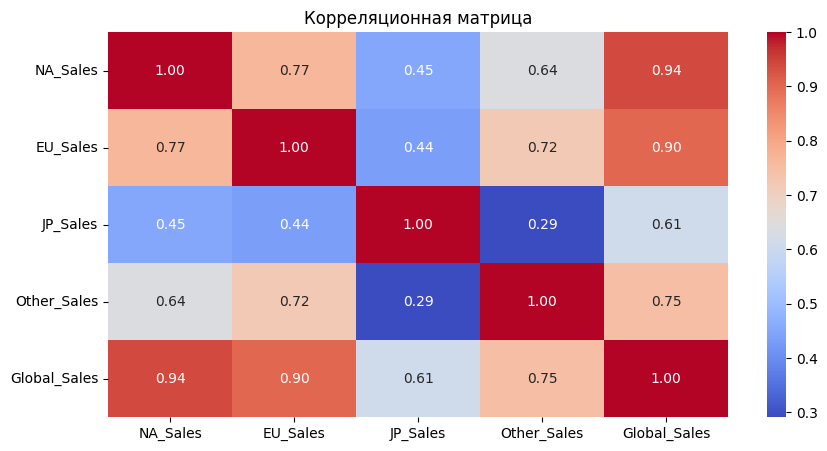

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.00,0.77,0.45,0.64,0.94
EU_Sales,0.77,1.00,0.44,0.72,0.90
JP_Sales,0.45,0.44,1.00,0.29,0.61
Other_Sales,0.64,0.72,0.29,1.00,0.75
Global_Sales,0.94,0.90,0.61,0.75,1.00


In [ ]:
# Корреляционная тепловая матрица для числовых переменных
correlation_matrix = df_copy[numeric_vars].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

# Стандартное представление
df_copy[numeric_vars].corr().round(2)

In [ ]:
# Заметна сильная корреляция между мировыми продажами и американскими, европейскими
# Можно сделать вывод, что основная доля продаж приходится на Америку и Европу

# Категориальные переменные

In [ ]:
# Выделяем категориальные переменные
cat_vars = ['Genre', 'Platform','Publisher']

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94


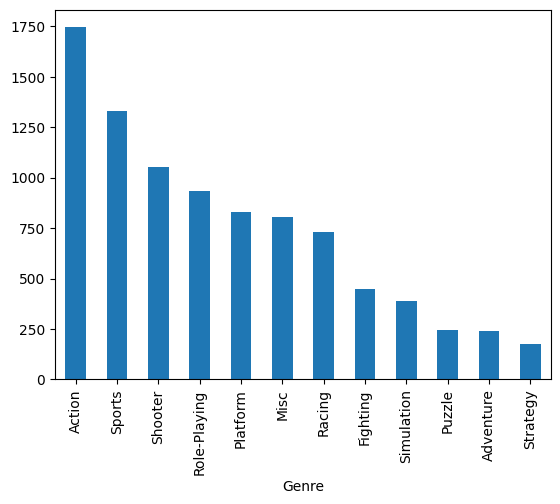

In [ ]:
# Считаем как разделяются игры по жанру
genre_table = df_copy.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

genre_table.plot.bar() # Применяем стандартный barplot

genre_table.head(3) # Выводим количественно топ-3

In [ ]:
# Видно, что больше всего прибыль приносят игры в жанре Action, Sports, Shooter

        напишите свой ответ здесь → `Action, Sports, Shooter`

### **Задание 3**

Вы сохраняли результат своей работы локально. Насколько это удобно с точки зрения работы в компании, где в работу вовлечены коллегами?

          напишите свой ответ здесь → `локально неудобно, но облачная работа с файлом или кодом (+ версионированием как в git) - решает проблему`

### **Задание 4**

Подтвердите или опровергните вывод о том, что первые три строчки в глобальных продажах Nintendo занимают игры:

- Wii Sports;
- Super Mario Bros;
- Mario Kart Wii.

In [ ]:
# Проверяем на наличие дубликатов по Name, т.к. одна и та же игра могла перевыпускаться

# Фильтруем по Nintendo
nintendo_df = df_copy[df_copy['Publisher'] == 'Nintendo']

# Посчитаем количество появлений каждого Name
name_counts = nintendo_df['Name'].value_counts()

# Выведем только те имена, которые встречаются более одного раза (дубликаты)
duplicates = name_counts[name_counts > 1]

duplicates.head(3)

,count
Name,
Monster Hunter Tri,3
Mario Tennis,3
Donkey Kong Country,3


In [ ]:
# Т.к. дубликаты есть, требуется группировка по Name

In [ ]:
# Фильтрация по издателю Nintendo

nintendo_sales = df_copy[df_copy['Publisher'] == 'Nintendo'].groupby('Name')['Global_Sales'].sum()

nintendo_sales.sort_values(ascending=False).head(3)


,Global_Sales
Name,
Wii Sports,82.53
Super Mario Bros.,45.31
Tetris,35.84


        напишите свой ответ здесь → `Вывод опровергается, топ-3 строчек занимают игры: Wii Sports, Super Mario Bros., Tetris`

### **Задание 5**

При написании кода разработчики и дата-сайентисты допускают ошибки. Это нормально — ошибки неизбежно возникают при создании программного обеспечения. По разным данным, на устранение багов тратится до 25% времени. Допустим, что при выполнении задания №4 вы допустили досадную оплошность и при создании датафрейма указали несуществующий метод **from_dictionary** вместо правильного метода **from_dict**.

1. Скопируйте код ниже.

2. Создайте ячейку с кодом (нажав на кнопку Python внизу).

3. Если вы работаете через marimo notebook, то вставьте код в созданную ячейку и получите ошибку *AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'*
Если вы используете другую среду, обратитесь к LLM напрямую.

4. Если вы работаете через marimo notebook, то исправьте ошибку, нажав на кнопку Fix with AI и затем нажмите Enter в открывшейся ячейке. После завершения генерации нажми Accept справа, чтобы вставить исправленный результат в блокнот.
Если вы используете другую среду, обратитесь к LLM напрямую.


```python
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df
```

In [ ]:
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')

AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'

In [ ]:
# При использовании встроенного решения gemini, также работает исправление кода, ответ от gemini:
  # It seems like there's a small typo in the code. The method to create a DataFrame from a dictionary is from_dict, not from_dictionary. I'll fix that for you.
  # Great! You've successfully fixed the error and created the DataFrame. Is there anything else you'd like to do with this dataset, like performing more analysis or visualizations based on the tasks outlined in the notebook?

In [ ]:
df = pd.DataFrame.from_dict([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


In [13]:
# Пример возможной обработки пропусков на открытых данных с помощью LLM

import openai
import pandas as pd
import json
from openai import OpenAI
import numpy as np

from google.colab import userdata
api_key = userdata.get('GPT-API')

# Настройка клиента (для openai>=1.0.0)
client = openai.OpenAI(api_key=api_key)

def fill_with_openai(df_missing):
    """
    Заполняет пропуски через OpenAI GPT-4o-mini
    """
    # Преобразуем данные в JSON для промпта
    data_json = df_missing.to_json(orient='records', indent=2)

    # Создаем промпт
    prompt = f"""
Ты эксперт по видеоиграм. Заполни пропущенные значения (null) в данном наборе данных.

ИСХОДНЫЕ ДАННЫЕ в JSON формате:
{data_json}

ИНСТРУКЦИИ:
1. Заполни ВСЕ null значения в столбцах: Name, Genre, Year_of_Release, Publisher
2. Используй только реальные, достоверные данные о видеоиграх
3. Для Year_of_Release используй только годы между 1970-2024
4. Для Genre используй стандартные жанры: Action, Adventure, RPG, Shooter, Sports, Platform, Strategy, Puzzle, Racing
5. Сохрани все оригинальные значения, которые уже заполнены
6. Верни ОДИН JSON массив с теми же объектами, но с заполненными пропусками

ВЕРНИ ТОЛЬКО JSON БЕЗ КАКИХ-ЛИБО ПОЯСНЕНИЙ ИЛИ ОБЕРТОК!
"""

    try:
        # Отправляем запрос к OpenAI
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Ты помощник для заполнения пропусков в данных о видеоиграх. Отвечай только JSON."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.1,
            max_tokens=4000
        )

        # Извлекаем ответ
        result_text = response.choices[0].message.content.strip()

        # Парсим JSON
        filled_data = json.loads(result_text)

        # Конвертируем обратно в DataFrame
        return pd.DataFrame(filled_data)

    except Exception as e:
        print(f"Ошибка: {e}")
        return df_missing


### **Задание на дополнительный балл**

Скопируйте код ниже, создайте ячейку с кодом (нажав на кнопку Python внизу) и вставьте код в созданную ячейку.

Постройте график зависимости потребности в труде L (по оси Y) от доли задач, подлежащих полной автоматизации $Φ(i)$ (по оси Х) ,
используя формулу $Φ = K/L   / (1 + K/L)$, где L — количество единиц рабочей силы, $K$ — количество единиц капитала, $Φ(i)$ — функция распределения.

```python
df = pd.DataFrame.from_dictionary([ {"K":[0.00,0.25,0.50,0.75,1.00]},
                                    {"L":[1.00,0.75,0.50,0.25,0.00]},
                                    {"phi":[0.00,0.25,0.50,0.75,"∞" ]}],
                                     orient='columns')
df
```

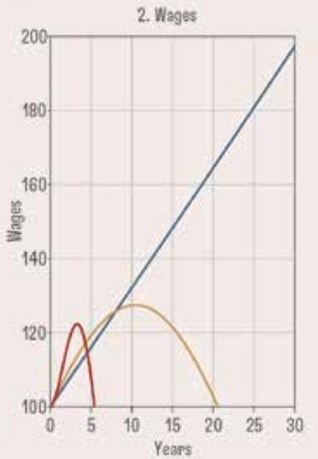

Проведите сравнение заработных плат при разных сценариях полной автоматизации. Для выполнения задания изучите источник: https://www.nber.org/system/files/working_papers/w32255/w32255.pdf

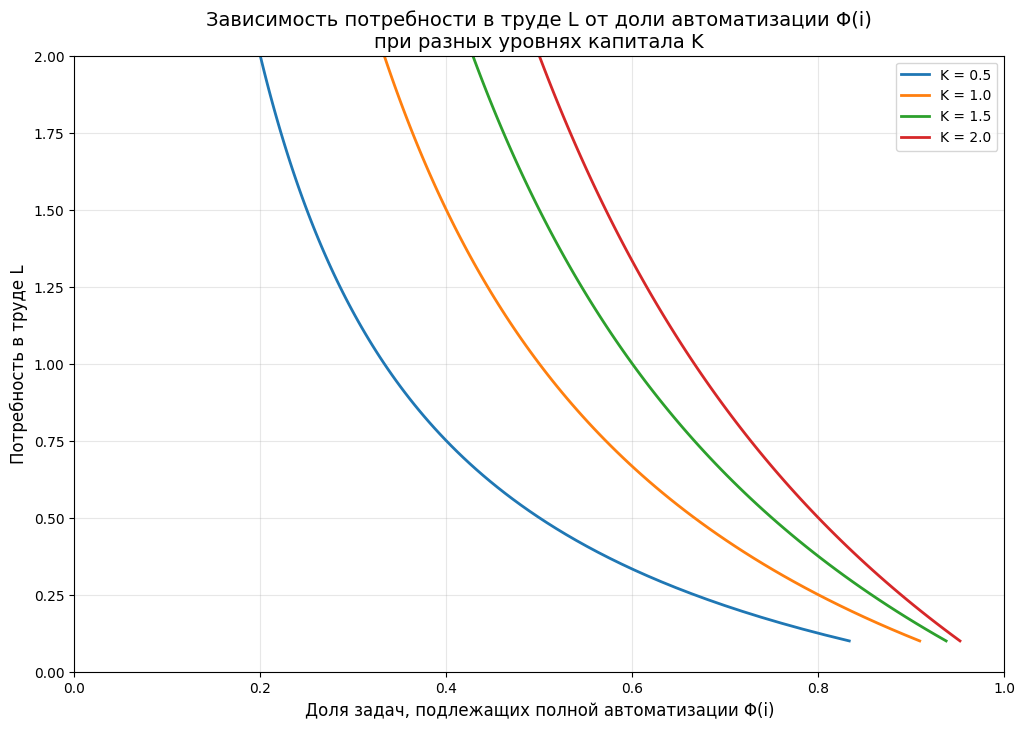

Сравнение заработных плат при разных сценариях автоматизации:
Капитал (K)   0.5   1.0   1.5   2.0
Труд (L)                           
0.25         0.75  1.25  1.75  2.25
0.50         1.00  1.50  2.00  2.50
0.75         1.25  1.75  2.25  2.75
1.00         1.50  2.00  2.50  3.00

🔍 Ключевые выводы:
1. При росте автоматизации (Φ) потребность в труде (L) снижается
2. Высокий капитал (K) позволяет достичь большей автоматизации при том же уровне труда
3. Заработная плата зависит от баланса между трудом и автоматизацией
4. Полная автоматизация (Φ→1) теоретически ведет к бесконечной производительности


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем данные на основе предоставленной формулы
def calculate_phi(K, L):
    return (K/L) / (1 + K/L) if L != 0 else np.inf

# Создаем диапазон значений
L_values = np.linspace(0.1, 2.0, 100)  # Избегаем деление на ноль
K_values = [0.5, 1.0, 1.5, 2.0]  # Разные уровни капитала

# Создаем график
plt.figure(figsize=(12, 8))

for K in K_values:
    phi_values = [calculate_phi(K, L) for L in L_values]
    plt.plot(phi_values, L_values, label=f'K = {K}', linewidth=2)

plt.xlabel('Доля задач, подлежащих полной автоматизации Φ(i)', fontsize=12)
plt.ylabel('Потребность в труде L', fontsize=12)
plt.title('Зависимость потребности в труде L от доли автоматизации Φ(i)\nпри разных уровнях капитала K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

# Создаем таблицу для сравнения
comparison_data = []
for K in [0.5, 1.0, 1.5, 2.0]:
    for L in [0.25, 0.5, 0.75, 1.0]:
        phi = calculate_phi(K, L)
        wage_ratio = L / (1 - phi) if phi < 1 else np.inf  # Относительная заработная плата
        comparison_data.append({'Капитал (K)': K, 'Труд (L)': L, 'Автоматизация (Φ)': round(phi, 2), 'Отн. зарплата': round(wage_ratio, 2)})

comparison_df = pd.DataFrame(comparison_data)
print("Сравнение заработных плат при разных сценариях автоматизации:")
print(comparison_df.pivot_table(values='Отн. зарплата', index='Труд (L)', columns='Капитал (K)'))

# Дополнительный анализ
print("\n🔍 Ключевые выводы:")
print("1. При росте автоматизации (Φ) потребность в труде (L) снижается")
print("2. Высокий капитал (K) позволяет достичь большей автоматизации при том же уровне труда")
print("3. Заработная плата зависит от баланса между трудом и автоматизацией")
print("4. Полная автоматизация (Φ→1) теоретически ведет к бесконечной производительности")

          напишите свой вывод